# Data Generation

In [21]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import torch

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = np.matmul(A,theta_true)+np.random.normal(loc=0.0, scale=scale, size=(data_num,1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50,dim_theta))
y_test = np.matmul(A_test,theta_true)+np.random.normal(loc=0.0, scale=scale, size=(50,1))


True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [32]:
#print('Not implemented.')

'''
Hints:
1. Use np.matmul() and la.inv() to solve for x in Ax = b.
2. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
at_b = np.matmul(A.T, y_data)
at_a_i = la.inv(np.matmul(A.T, A))
theta_pred = np.matmul(at_a_i ,at_b)
err = np.matmul(A, theta_pred) - y_data
mse = (1/data_num)*np.matmul(err.T, err)
print('Mean squared error', mse)
print('Empirical theta', theta_pred.reshape(-1))

Mean squared error [[0.01054382]]
Empirical theta [0.98662264 1.00010724 0.99961687 1.00518426 0.99305874 1.00049845
 0.99643593 1.01058597 1.01310949 1.00006637]


# SGD Variants Noisy Function

In [34]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [54]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        
      #  print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        '''
        grad = deg_ * (abs(err) ** (deg_ - 1)) * (abs(err) / err) * x_
        l = abs(err) ** deg_
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

#noisy_val_grad = noisy_poly_val_grad

# Running SGD Variants

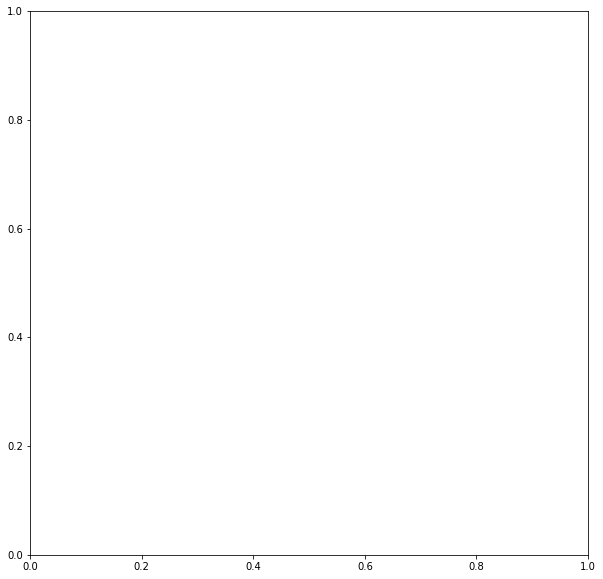

In [55]:
deg_ = 2.
num_rep = 10
max_iter = 1000
fig, ax = plt.subplots(figsize=(10,10))
best_vals = dict()
test_exp_interval = 50
grad_artificial_normal_noise_scale = 0.

adam 0
adam done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
[[2.97731134 2.76049247 2.6799753  2.62970268 2.59539771 2.56091077
  2.29122818 2.2061036  2.1954143  2.011144   1.89425993 1.88105364
  1.87241856 1.87182103 1.82999355 1.81672547 1.74857402 1.65905834
  1.64350501 1.64932441]
 [2.97731134 2.8289021  2.80751332 2.75610646 2.62654379 2.56785206
  2.38369835 2.29079193 2.27871569 2.24656281 2.03033116 1.88679039
  1.84620724 1.50037857 1.42861873 1.40561342 1.37612801 1.33451654
  1.32658628 1.28786896]
 [2.97731134 2.93638674 2.91148627 2.86846109 2.66756665 2.58831536
  2.57003777 2.58519319 2.59849127 2.51475077 2.47934001 2.40965747
  1.87638603 1.76495113 1.75915426 1.71879286 1.69265534 1.64057968
  1.60883198 1.57427845]
 [2.97731134 2.94887456 2.84867946 2.7614118  2.68581439 2.70753002
  2.71268074 2.7264066

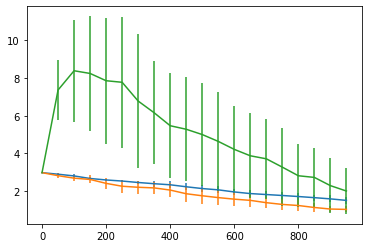

In [77]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
         #   print('Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0
            v = 0
            epsilon = 10 ** (-8)

        if method == 'adagrad':
          #  print('Not implemented.')
            lr = .1
            epsilon = 10 ** (-8)
            squared_sum = 0
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []
        
        for t in range(max_iter):
            idx = np.random.choice(data_num,batch_size)
            if (t % 50 == 0):
                train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10,1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10,1))-0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)                
            
            if method == 'adam':
             #   print('Not implemented.')
                m = beta_1 * m + (1- beta_1) * gradient
                v = beta_2 * v + (1- beta_2) * gradient**2
                m_hat = m/(1-(beta_1**(t+1)))
                v_hat = v/(1-(beta_2**(t+1)))
                theta_hat = theta_hat - lr * (m_hat/(np.sqrt(v_hat) + epsilon))
            
            elif method == 'adagrad':
               # print('Not implemented.')
                squared_sum = squared_sum + gradient**2
                theta_hat = theta_hat - lr * (gradient / (np.sqrt(squared_sum + epsilon)))
            
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
        
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        
    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)
    
   # print('Not implemented.')
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0) 

    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0 
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np, axis=0) / np.sqrt(num_rep)
    print(test_loss_np)
    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

No handles with labels found to put in legend.


Text(0.5, 0, 'Updates')

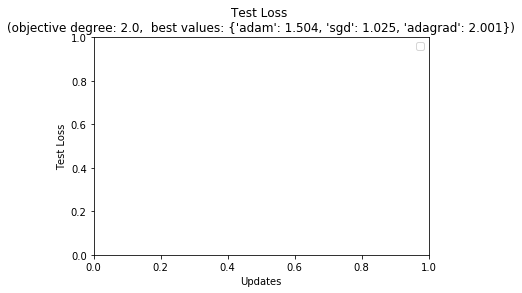

In [78]:
best_vals = {k: int(v*1000)/1000. for k,v in best_vals.items()} # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')